# Logistic Regression

### Example 1

Consider ‘Heart’ data set from ISLR library. 

http://www.awesomestats.in/python-classification-german-credit-rating/

Using Logistic Regression, predict heart disease (AHD) based on various parameters including clinical parameters and risk factors.

### Load the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split

import statsmodels.api as sm

from scipy import stats
from sklearn import metrics

%matplotlib inline

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

D:\Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Define useful functions 

A *function* is a block of organized, reusable code that is used to perform a single, related action. 

**Functions** provide better modularity for your application and a high degree of code reusing.

### (1)  Function: draw_barplot()

**Grouped Bar Chart** is used to represent and compare different categories of two or more groups. Because the categories are grouped and arranged side-by-side, the bar clusters make easy to interpret the differences inside a group, and even between the same category across groups.

**Function name:** draw_barplot()

**Description:** This program does the following:

* prints the cross tab with count and row percentages 

* plots grouped bar chart (grouped by the target variable, **AHD**

**Input:** 

       1) Data Frame

       2) Column name of the predictor variable selected
       
       3) Label for the predictor variable
       
       4) Title for the grouped bar chart

**Output:**

        1) Cross tab with count and row percentages
        
        2) Grouped Bar chart

In [2]:
def draw_barplot(df, X, xlab, title):
    
    x       =   df[X]
    AHD     =   df['AHD']

    ct = pd.crosstab(df[X], df['AHD'])
    print("\n Cross tab with count\n")
    print(ct)

    ### Cross tab with row percentages
    print("\n Cross tab with row % \n")
    ct1 = pd.crosstab(df[X], df['AHD'], normalize='index').round(4)*100
    print(ct1)

    # now stack and reset
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    # plot grouped bar chart
    ax = sns.barplot(x = stacked[X], y = stacked.value, hue=stacked.AHD)
    ax.set_title(title)    
    plt.show()

### (2)  Function: draw_boxplot()

**Boxplot** is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability. In a box and whisker plot: the ends of the box are the upper and lower quartiles, so the box spans the interquartile range.

We also compute the descriptive statistics for the selected predictor variable X and also the target variable, AHD to compare their median values.

**Function name:** draw_boxplot()

**Description:** This program does the following:

*   prints the summary statistics grouped by target variable, **AHD**

*   plots box chart (grouped by the target variable, **AHD**

**Input:**

          1) Data Frame containing the data for analysis
          
          2) Column name of the predictor variable selected
          
          3) Label for the predictor variable 
          
          4) Title for the grouped bar chart

**Output:**

          1) Cross tab with count and row percentages 
          
          2) Grouped Bar chart


In [3]:
def draw_boxplot(df, X, xlab, title):

    x       =   df[X]
    AHD     =   df['AHD']
    
    print("\n Summary statistics for  " + xlab + "\n")
    print(df[X].groupby(df['AHD']).describe().T)

    sns.set_style("whitegrid")
    ax = sns.boxplot(x = df[X] ,y = df['AHD'])
    ax.set_title(title)
    plt.show()         

### (4) Function: get_significant_vars()

Function name: get_significant_vars()

Description: This function does the following:

* lists the significant variables at the specified significance level from the coefficients table

Input:

      1) Fitted model

      2) Desired Level of significance

Output:

      1) List of significant variables at the desired level of significance        


In [4]:
def get_significant_vars( lm, sig_level ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= sig_level]['vars'] )

### (4) Function: get_predictions()

**Function name:** get_predictions()

**Description:** This function does the following:

*   predicts the target variables and returns a data frame of actual and predicted values based on the input data frame of features and fitted model 


**Input:**

          1) Data Frame containing features
          
          2) Data frame containing the target variable
          
          3) Fitted model
          
**Output:**

          1) a data frame of actual and predicted values          


def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
    "predicted_prob": lg.predict( sm.add_constant( x_test ) ) } )
    return y_pred_df

In [5]:
def get_predictions( x, y, model ):
    y_pred_df = pd.DataFrame( { 'actual': y,
    "predicted_prob": model.predict( sm.add_constant( x ) ) } )
    return y_pred_df

### (5) Function: draw_cm()

**Function name:** draw_cm()

**Description:** This function does the following:

*   plots a heat graph for confusion matrix 


**Input:**

          1) Data Frame containing actual values
          
          2) Data frame containing predicted values
          
          
**Output:**

          1) a nice confusion matrix graph      


In [6]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### (5) Function: draw_roc()

**Function name:** draw_roc()

**Description:** This function does the following:

*   plots a ROC and reports the area under ROC for the specified input


**Input:**

          1) Data Frame containing actual values for the target variable
          
          2) Data frame containing predicted probabilities
          
          
**Output:**

          1) a nice ROC graph with AUROC mentioned     


In [7]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

gre = sns.regplot(x= 'gre', y= 'admit', data= df, logistic= True).set_title("GRE Log Odds Linear Plot")
gre.figure.savefig("gre log lin.png")

### (6) Function: check_linearity()

**Function name:** check_linearity()

**Description:** This function does the following:

*   Checks whether continuous Independent Variable is linearly related to the log odds of the IV by plotting the IV in question and look for an S-shaped curve. 


**Input:**

          1) Data Frame containing the independent variable
          
          2) Data frame containing the complete data
          
          3) Title for the graph
          
          
**Output:**

          1) a  plot showing the linearity of the independent variable  


In [8]:
def check_linearity(x1, df, title):
    sns.regplot(x = x1, y= 'AHD', data= df, logistic= True).set_title(title)
    plt.show()

### (7) Function: draw_hist()

**Function name:** draw_hist()

**Description:** This function does the following:

*   plots a histogram for the specified variable


**Input:**

          1) Data Frame containing numerical variable         
      
          
**Output:**

          1) A **histogram** graph 

In [9]:
def draw_hist(df, X, title):
    sns.distplot(df[X]).set_title(title)
    plt.show()

#### (8) Function: get_youdens_j_cutoff()

**Function name:** get_youdens_j_cutoff()

**Description:** This function does the following:

*   calculates the Youdens J score which gives the optimum cut-off point  given the fpr, tpr and thresholds


**Input:**

          1) List of fpr values
          
          2) List of tpr values
          
          3) thresholds
      
          
**Output:**

          1) Youdens J score

In [10]:
def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

#### (8) Function: get_cost_cutoff()

Function name: get_cost_cutoff()

Description: This function does the following:

    calculates the optimum cut-off point based on lowest cost of misclassification

Input:

      1) Data Frame containing actual values for the target variable

      2) Data frame containing predicted values 

      3) Cost of False positive - misclassification
      
      4) Cost of False Negative - misclassification
      

Output:

      1) Total cost of misclassification


In [11]:
def get_cost_cutoff(actual, predicted, cost_fp, cost_fn):
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_matrix      =  np.array( cm )    
    est_cost       =  cm_matrix[0,1] * cost_fn  +  cm_matrix[1, 0] * cost_fp 
    return est_cost

### Read Data 

In [12]:
data = pd.read_csv('./data/Heart.csv', header = 0)

Get the data dimension

In [13]:
print(data.shape)

(303, 15)


**Observation**

There are 303 observations and 15 variables used for our analysis.

See the first few rows of data set

In [14]:
print(data.head().T)

                  0             1             2           3           4
Unnamed: 0        1             2             3           4           5
Age              63            67            67          37          41
Sex               1             1             1           1           0
ChestPain   typical  asymptomatic  asymptomatic  nonanginal  nontypical
RestBP          145           160           120         130         130
Chol            233           286           229         250         204
Fbs               1             0             0           0           0
RestECG           2             2             2           0           2
MaxHR           150           108           129         187         172
ExAng             0             1             1           0           0
Oldpeak         2.3           1.5           2.6         3.5         1.4
Slope             3             2             2           3           1
Ca                0             3             2           0     

Get the column names of the data set

In [15]:
print(list(data.columns))

['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']


### Understanding the data types and required transformation

| Column Name | Original Data Type | Desired Data Type | Description |
| --- | --- | --- | --- |
| Unnamed: 0 | Numeric |  Numeric | Index - Not required - to be removed |
| Age | Numeric | Numeric | Age of the patient |
| Sex | Numeric | Categorical | Gender of the patient (1 = male; 0 = female)  |
| ChestPain | Categorical | Categorical | Chest Pain type |
| RestBP | Numeric | Numeric | Resting blood pressure (in mm Hg)|
| Chol | Numeric | Numeric |  Serum cholestoral in mg/dl  |
| Fbs | Numeric | Categorical |  (Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  |
| RestECG | Numeric | Categorical | resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |
| MaxHR | Numeric | Numeric | Maximum Heart Rate of the patient |
| ExAng | Numeric | Categorical | Exercise induced angina (1 = yes; 0 = no) |
| Oldpeak | Numeric | Numeric | ST depression induced by exercise relative to rest |
| Slope | Numeric | Categorical | The slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping  |
| Ca | Numeric | Numeric | Number of major vessels (0-3) colored by flourosopy  |
| Thal | Categorical | Categorical |Defect Type |
| AHD | Categorical | Categorical | Presence of Atherosclerotic Heart Disease |

### What could be the target variable?

AHD is the target variable denoting the *Presence of Atherosclerotic Heart Disease*. The problem on hand is a **CLASSIFICATION PROBLEM**.

Let us find out how many of the observations are having value Yes and No for this variable, **AHD**

### Check for missing values

In [16]:
data.isnull().any()

Unnamed: 0    False
Age           False
Sex           False
ChestPain     False
RestBP        False
Chol          False
Fbs           False
RestECG       False
MaxHR         False
ExAng         False
Oldpeak       False
Slope         False
Ca             True
Thal           True
AHD           False
dtype: bool

We observe that the variables, *Ca and Thal* have missing values.
We shall identify them and remove them.

In [17]:
all_columns     = data.columns
print(data[data.isnull().any(axis=1)][all_columns].head().T)

                   87          166           192           266         287
Unnamed: 0          88         167           193           267         288
Age                 53          52            43            52          58
Sex                  0           1             1             1           1
ChestPain   nonanginal  nonanginal  asymptomatic  asymptomatic  nontypical
RestBP             128         138           132           128         125
Chol               216         223           247           204         220
Fbs                  0           0             1             1           0
RestECG              2           0             2             0           0
MaxHR              115         169           143           156         144
ExAng                0           0             1             1           0
Oldpeak              0           0           0.1             1         0.4
Slope                1           1             2             2           2
Ca                   0   

**Observation**

There are three missing values for the variable, *Ca* and two missing values for the variable, *Thal*

### Remove missing values and unwanted column

In [18]:
data_no_missing = data.dropna()

### Remove unwanted column "Unnamed: 0 "
data_clean      = data_no_missing.drop(['Unnamed: 0'], axis = 1)
data_required   = data_clean 

print(data_required.shape)

(297, 14)


**Observation**

After removing the missing values, there are 297 observations and 14 variables that includes the target variable, *AHD*

## Explanatory Data Analysis

Before carrying out EDA, we need to convert the following variables into categorical variables:
* *Sex*
* *Fbs*
* *RestECG*
* *ExAng*
* *Slope*
* *Ca*

In [19]:
data_required['Sex_Cat']     = data_required.Sex.astype("category")
data_required['Fbs_Cat']     = data_required.Fbs.astype("category")
data_required['RestECG_Cat'] = data_required.RestECG.astype("category")
data_required['ExAng_Cat']   = data_required.ExAng.astype("category")
data_required['Slope_Cat']   = data_required.Slope.astype("category")
data_required['Ca_Cat']      = data_required.Ca.astype("category")


In [20]:
data_required.head().T

,0,1,2,3,4
Age,63,67,67,37,41
Sex,1,1,1,1,0
ChestPain,typical,asymptomatic,asymptomatic,nonanginal,nontypical
RestBP,145,160,120,130,130
Chol,233,286,229,250,204
Fbs,1,0,0,0,0
RestECG,2,2,2,0,2
MaxHR,150,108,129,187,172
ExAng,0,1,1,0,0
Oldpeak,2.3,1.5,2.6,3.5,1.4


In [21]:
data_required[['Age','RestBP','Chol','MaxHR','Oldpeak']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
RestBP,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
Chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
MaxHR,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
Oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


**Observation**

We observe from the above table:

*  for the following variables **mean is almost equal to the 50% percentile or median** indicating a possible normal distribution and the histogram to be symmetrical:

* 1) Age
* 2) RestBP


*  for the following variables **mean is more than the 50% percentile or median** indicating the distribution is skewed to the right:

* 1) Oldpeak
* 2) Chol


*  for the following variables **mean is less than the 50% percentile or median** indicating the distribution is skewed to the left:

* 1) MaxHR



#### Histogram for Age

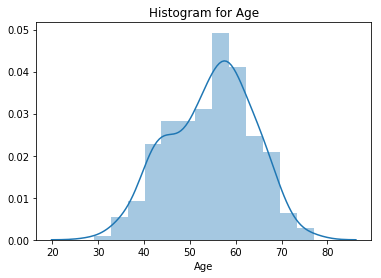

In [22]:
draw_hist(data_required, 'Age', 'Histogram for Age')

**Observation**

The shape of the histogram looks almost symmetrical and of normal shape.  

#### Histogram for RestBP

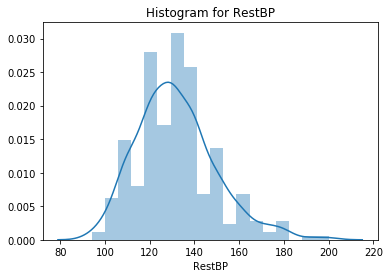

In [23]:
draw_hist(data_required, 'RestBP', 'Histogram for RestBP')

**Observation**

The shape of the histogram looks almost symmetrical and of normal shape.  

#### Histogram for Cholesterol

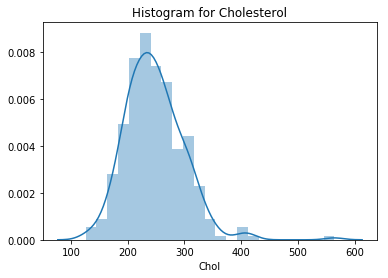

In [24]:
draw_hist(data_required, 'Chol', 'Histogram for Cholesterol')

**Observation**

The shape of the histogram looks looks slightly skewed to the left.   

#### Histogram for Maximum Heart Rate of the patient

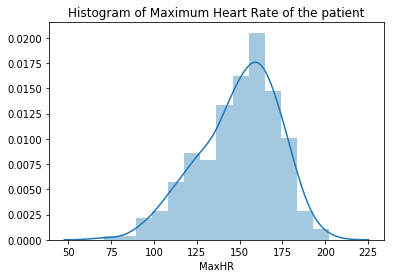

In [25]:
draw_hist(data_required, 'MaxHR', 'Histogram of Maximum Heart Rate of the patient') 

**Observation**

The shape of the histogram looks slightly skewed to the right. 

#### Histogram for ST depression induced by exercise relative to rest

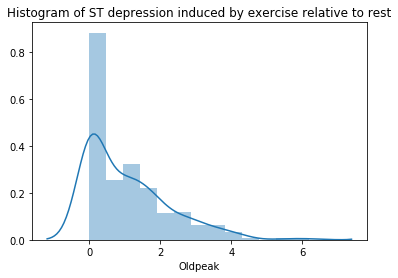

In [26]:
draw_hist(data_required, 'Oldpeak', 'Histogram of ST depression induced by exercise relative to rest') 

**Observation**

The shape of the histogram looks slightly skewed to the right. 

### Grouped Bar Charts 

#### Cross tab - Sex Vs AHD


 Cross tab with count

AHD      No  Yes
Sex_Cat         
0        71   25
1        89  112

 Cross tab with row % 

AHD         No    Yes
Sex_Cat              
0        73.96  26.04
1        44.28  55.72


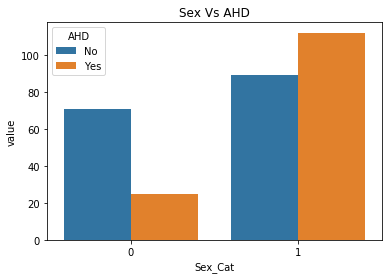

In [27]:
draw_barplot(data_required, 'Sex_Cat','Sex', 'Sex Vs AHD')

**Observation**

We observe that presence of AHD is more for Male patients than Female patients. 

#### Cross tab - Fbs Vs AHD


 Cross tab with count

AHD       No  Yes
Fbs_Cat          
0        137  117
1         23   20

 Cross tab with row % 

AHD         No    Yes
Fbs_Cat              
0        53.94  46.06
1        53.49  46.51


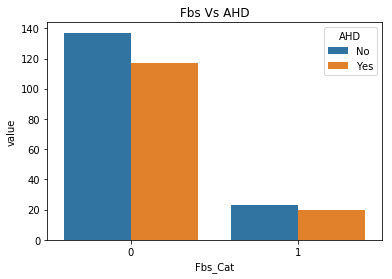

In [28]:
draw_barplot(data_required, 'Fbs_Cat','Fbs', 'Fbs Vs AHD')

## **Observation**

We observe that the AHD present in the patients having Fbs more than 120 mg/dl is **slightly higher** than patients having Fbs less than 120 mg/dl.

#### Cross tab - RestECG Vs AHD


 Cross tab with count

AHD          No  Yes
RestECG_Cat         
0            92   55
1             1    3
2            67   79

 Cross tab with row % 

AHD             No    Yes
RestECG_Cat              
0            62.59  37.41
1            25.00  75.00
2            45.89  54.11


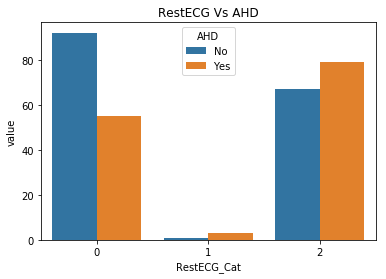

In [29]:
draw_barplot(data_required, 'RestECG_Cat','RestECG', 'RestECG Vs AHD')

**Observation**

1) We do not have sufficient data points for the variable, RestECG with category 1 (having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))

2) We observe that presence of AHD increases with levels of RestECG. 

#### Cross tab - Exercise induced angina Vs AHD 


 Cross tab with count

AHD         No  Yes
ExAng_Cat          
0          137   63
1           23   74

 Cross tab with row % 

AHD           No    Yes
ExAng_Cat              
0          68.50  31.50
1          23.71  76.29


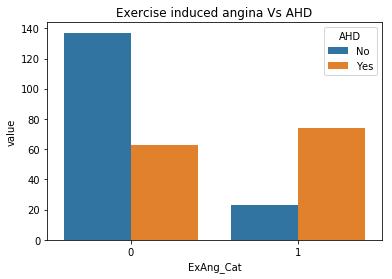

In [30]:
draw_barplot(data_required, 'ExAng_Cat','Exercise induced angina', 'Exercise induced angina Vs AHD')

**Observation**

We observe that presence of AHD is higher for patients for whom *Exercise induced angina* is **yes** than **no**.

####  Cross tab  - The slope of the peak exercise ST segment Vs AHD


 Cross tab with count

AHD         No  Yes
Slope_Cat          
1          103   36
2           48   89
3            9   12

 Cross tab with row % 

AHD           No    Yes
Slope_Cat              
1          74.10  25.90
2          35.04  64.96
3          42.86  57.14


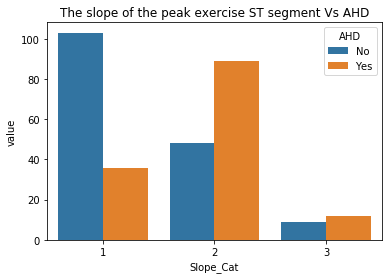

In [31]:
draw_barplot(data_required, 'Slope_Cat','slope of the peak exercise ST segmenta', 'The slope of the peak exercise ST segment Vs AHD')

**Observation**

We observe that presence of AHD is higher when levels of the slope of the peak exercise ST segment is more than 1. We need more data to conclude. 

####  Cross tab  - Chest Pain Vs AHD


 Cross tab with count

AHD           No  Yes
ChestPain            
asymptomatic  39  103
nonanginal    65   18
nontypical    40    9
typical       16    7

 Cross tab with row % 

AHD              No    Yes
ChestPain                 
asymptomatic  27.46  72.54
nonanginal    78.31  21.69
nontypical    81.63  18.37
typical       69.57  30.43


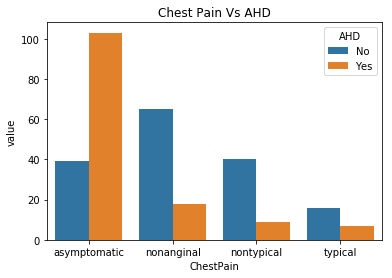

In [32]:
draw_barplot(data_required, 'ChestPain','Chest Pain', 'Chest Pain Vs AHD')

**Observation**

* Incidence of AHD is higher for patients having asymptomatic chest pain than patients with other types of chest pain. We need more data to conclude. 

* Asymptomatic means neither causing nor exhibiting symptoms of disease. Not all heart attacks produce chest pain or the well-known classic symptoms. So called silent heart attacks, however, can be just as deadly.

####  Cross tab  - Defect Type Vs AHD


 Cross tab with count

AHD          No  Yes
Thal                
fixed         6   12
normal      127   37
reversable   27   88

 Cross tab with row % 

AHD            No    Yes
Thal                    
fixed       33.33  66.67
normal      77.44  22.56
reversable  23.48  76.52


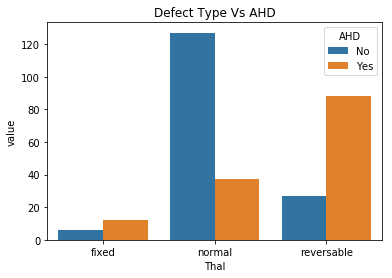

In [33]:
draw_barplot(data_required, 'Thal','Defect Type', 'Defect Type Vs AHD')

**Observation**

Based on the data provided to us, we observe that the *Incidence of AHD* is **higher** for patients having Defect Types (fixed, reversable) than patients with normal defect types. We need more data to conclude

### Cross tab - Number of major vessels (0-3) colored by flourosopy Vs AHD


 Cross tab with count

AHD      No  Yes
Ca_Cat          
0.0     129   45
1.0      21   44
2.0       7   31
3.0       3   17

 Cross tab with row % 

AHD        No    Yes
Ca_Cat              
0.0     74.14  25.86
1.0     32.31  67.69
2.0     18.42  81.58
3.0     15.00  85.00


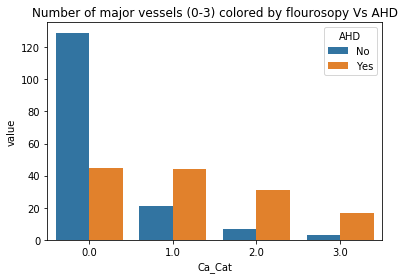

In [34]:
draw_barplot(data_required, 'Ca_Cat','Number of major vessels (0-3) colored by flourosopy', 'Number of major vessels (0-3) colored by flourosopy Vs AHD')

**Observation**

Based on the data provided to us, we observe *Number of major vessels (0-3) colored by flourosopy* increases for patients having AHD than patients who are do not have AHD disease. 

We need to study the effect of following variables on the target varible, **AHD**
* Age
* RestBP
* Chol
* MaxHR
* Oldpeak

We will check the presence of the outliers, which is an observation that lies at an abnormal distance from other values in a data set for a continuous, numerical variable. Basically they are extreme values. Using box plots, we identify observations that are lying beyond an outer boundary of (Q3 - 1.5 IQR) and  (Q3 + 1.5 IQR). Here Q3 is the third Quartile (75th percentile), Q1 is the first Quartile (25th perecentile) and IQR, the **Inter Quartile Range**, difference between Q3 and Q1 (Q3 - Q1).

We need to deal with *Outliers* carefully. They could be mere typos or a possible correct value. They may contain valuable information about the data gathering and recording process. Before deciding to eliminate these points from the data, one should try to understand the root cause of why they appeared and whether similar values will continue to appear. Outliers are often bad data points influencing the data analysis. 

#### Age Vs AHD 


 Summary statistics for  Age

AHD            No         Yes
count  160.000000  137.000000
mean    52.643750   56.759124
std      9.551151    7.899670
min     29.000000   35.000000
25%     44.750000   53.000000
50%     52.000000   58.000000
75%     59.000000   62.000000
max     76.000000   77.000000


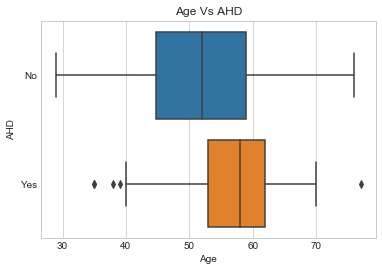

In [35]:
draw_boxplot(data_required, 'Age', 'Age', 'Age Vs AHD')

**Observation**

* Based on the data provided to us, we observe that the patients whose median age (58 years) with *Incidence of AHD* is **more** than medain age of patients who are do not have AHD disease.

* We see an outlier, the diamond-like symbol below age 40 and above 70. Since the minimum value for Age for patients having AHD is 35 years and maximum value is 77 years and these values are quite common nowadays, we can safely ignore the outliers. 

#### Resting blood pressure (in mm / Hg) Vs AHD


 Summary statistics for  RestBP

AHD           No         Yes
count  160.00000  137.000000
mean   129.17500  134.635036
std     16.37399   18.896730
min     94.00000  100.000000
25%    120.00000  120.000000
50%    130.00000  130.000000
75%    140.00000  145.000000
max    180.00000  200.000000


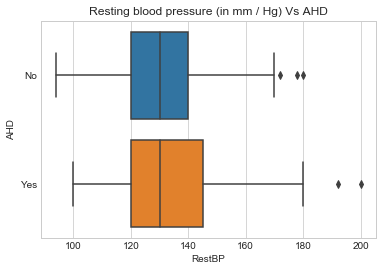

In [36]:
draw_boxplot(data_required, 'RestBP', 'RestBP', 'Resting blood pressure (in mm / Hg) Vs AHD')

**Observation**

* Based on the data provided to us, we observe that the patients whose median median BP with *Incidence of AHD* is **same** as median BP of patients who are do not have AHD disease.

* We see several outliers, for both AHD and without AHD. We observe the maximum value for RestBP for patients having AHD is 200 mm/hg and maximum value for patients without AHD is 180. *Since these values are quite common nowadays, we can safely ignore these outliers.* 

#### Serum cholestoral in mg/dl Vs AHD 


 Summary statistics for  Chol

AHD           No         Yes
count  160.00000  137.000000
mean   243.49375  251.854015
std     53.75755   49.679937
min    126.00000  131.000000
25%    208.75000  218.000000
50%    235.50000  253.000000
75%    268.25000  284.000000
max    564.00000  409.000000


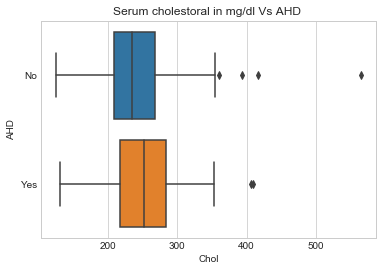

In [37]:
draw_boxplot(data_required, 'Chol', 'Chol', 'Serum cholestoral in mg/dl Vs AHD ')

Observation

*    Based on the data provided to us, we observe that the patients whose median Serum cholestoral with Incidence of AHD is slightly more than the patients who are do not have AHD disease.

*    We see several outliers, one for patient with AHD and  four outliers for patients without AHD. We observe the maximum value for Serum cholestoral for patients having AHD is 409 mm/hg and maximum value for patients without AHD is 564. Since these values are quite common nowadays, we can safely ignore these outliers.

#### Maximum Heart Rate of the patient Vs AHD 


 Summary statistics for  MaxHR

AHD            No         Yes
count  160.000000  137.000000
mean   158.581250  139.109489
std     19.043304   22.710673
min     96.000000   71.000000
25%    149.000000  125.000000
50%    161.000000  142.000000
75%    172.000000  157.000000
max    202.000000  195.000000


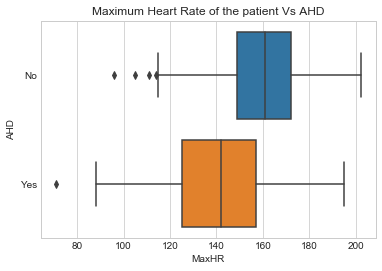

In [38]:
draw_boxplot(data_required, 'MaxHR', 'MaxHR', 'Maximum Heart Rate of the patient Vs AHD')

Observation

*    Based on the data provided to us, we observe that the patients whose median Maximum Heart Rate with Incidence of AHD is much lower than the patients who are do not have AHD disease. 

*    From the box plots, we see several outliers, one for AHD patients and four for patients without AHD. We observe the maximum value for Maximum Heart Rate for patients having AHD is 195 and maximum value for patients without Maximum Heart Rate is 202. Since these values are quite common nowadays, we can safely ignore these outliers.

#### ST depression induced by exercise relative to rest Vs AHD 


 Summary statistics for  Oldpeak

AHD           No         Yes
count  160.00000  137.000000
mean     0.59875    1.589051
std      0.78716    1.305006
min      0.00000    0.000000
25%      0.00000    0.600000
50%      0.20000    1.400000
75%      1.10000    2.500000
max      4.20000    6.200000


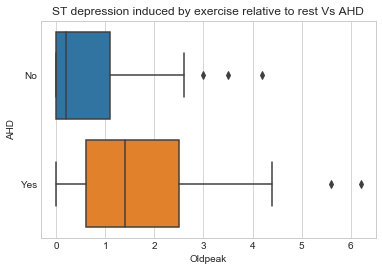

In [39]:
draw_boxplot(data_required, 'Oldpeak', 'Oldpeak', 'ST depression induced by exercise relative to rest Vs AHD')

Observation

*    Based on the data provided to us, we observe that the patients whose median ST depression induced by exercise relative to rest with Incidence of AHD is higher than the patients who are do not have AHD disease.

*    We see several outliers, for both AHD and without AHD. We observe the maximum value for ST depression induced by exercise relative to rest for patients having AHD is 6.2 and maximum value for patients without AHD is 4.2. We need to explore this further, before removing them.

### Find out the count for each class of the target variable

In [40]:
data_required['AHD'].value_counts()

No     160
Yes    137
Name: AHD, dtype: int64

**Observation**

1) Target variable with two classes are almost equally distributed with 54% for class *No* and 46% for class *Yes*.

2) So, we have a balanced data set with almost equal proportion of classes.

**Logistic Regression Assumptions**

*   Binary logistic regression requires the target / dependent variable to be binary. 
    For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome
    (such as Success etc..).

*   Only the meaningful variables should be included.

*   The predictor variables should not be correlated to each other meaning the model should have little or no   
    multicollinearity.
    
*   The independent variables are linearly related to the log odds.

*   Logistic regression requires quite a large number of observations.  

### 1)    Binary logistic regression requires the target / dependent variable to be binary.

For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome (such as
Success etc..).

In [41]:
data         = data_clean
data['AHD']  = data_clean.AHD.replace(['Yes', 'No'], [1, 0])

###  2)   Only the meaningful variables should be included.

We have removed the unwanted variables, such as *Unnamed: 0*

###  3)   Absence of multicollinearity

### Let us find the correlation among numerical variables

In [42]:
num_variables = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
df_num        = data_required[np.intersect1d(data_required.columns, num_variables)]
print(df_num .corr())

              Age      Chol     MaxHR   Oldpeak    RestBP
Age      1.000000  0.202644 -0.394563  0.197123  0.290476
Chol     0.202644  1.000000 -0.000075  0.038596  0.131536
MaxHR   -0.394563 -0.000075  1.000000 -0.347640 -0.049108
Oldpeak  0.197123  0.038596 -0.347640  1.000000  0.191243
RestBP   0.290476  0.131536 -0.049108  0.191243  1.000000


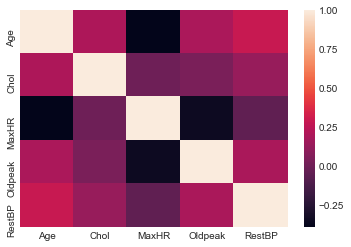

In [43]:
sns.heatmap(df_num.corr())
plt.show()

**Observation**

The correlation between pair of predictor variables is weak since the highest correlation among them is -0.39 only.

### 4) The independent variables are linearly related to the log odds.

Check the assumption of **Independent variables are linearly related to the log odds**

One way to checking this is to plot the Independent variables in question and look for an S-shaped curve.

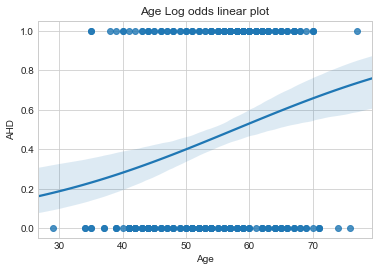

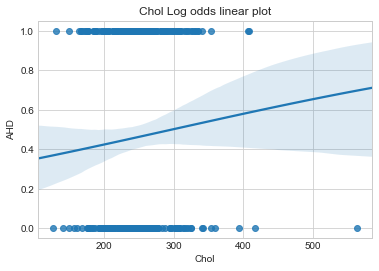

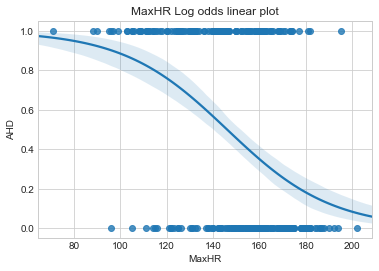

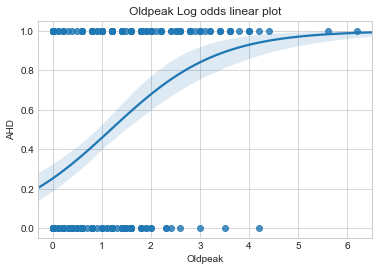

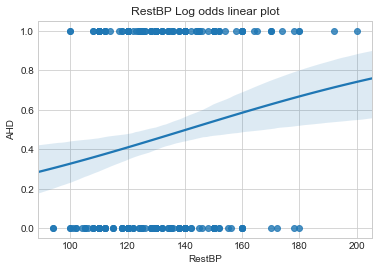

In [44]:
df2 = data_clean


check_linearity('Age',     df2,      title = 'Age Log odds linear plot')
check_linearity('Chol',    df2,     title = 'Chol Log odds linear plot')
check_linearity('MaxHR',   df2,    title = 'MaxHR Log odds linear plot')
check_linearity('Oldpeak', df2,  title = 'Oldpeak Log odds linear plot')
check_linearity('RestBP',  df2,   title = 'RestBP Log odds linear plot')


 **Observation**
 
 We observe the above graphs vaguely resemble the S-shaped curve that is required for establishing the linearity.
  

### 5) Logistic regression requires quite a large number of observations.  

A **general rule of thumb** is that at least 10 per variable.

We have 297 observations and 14 variables; so we have approximately 21 observations per variable.

In [45]:
list(data.columns)

['Age',
 'Sex',
 'ChestPain',
 'RestBP',
 'Chol',
 'Fbs',
 'RestECG',
 'MaxHR',
 'ExAng',
 'Oldpeak',
 'Slope',
 'Ca',
 'Thal',
 'AHD',
 'Sex_Cat',
 'Fbs_Cat',
 'RestECG_Cat',
 'ExAng_Cat',
 'Slope_Cat',
 'Ca_Cat']

Removing response variables and the redundant factor variables from the dataset

In [46]:
X_features = list(data.columns )
X_features.remove('AHD')
X_features.remove('Sex')
X_features.remove('Fbs')
X_features.remove('RestECG')
X_features.remove('ExAng')
X_features.remove('Slope')
X_features.remove('Ca')
X_features

['Age',
 'ChestPain',
 'RestBP',
 'Chol',
 'MaxHR',
 'Oldpeak',
 'Thal',
 'Sex_Cat',
 'Fbs_Cat',
 'RestECG_Cat',
 'ExAng_Cat',
 'Slope_Cat',
 'Ca_Cat']

In [47]:
data_complete = pd.get_dummies(data[X_features], drop_first= True)

In [48]:
len(data.columns)

20

In [49]:
len(data_complete.columns)

20

In [50]:
y = data['AHD']

In [51]:
x = data_complete

In [52]:
x.head().T

,0,1,2,3,4
Age,63.0,67.0,67.0,37.0,41.0
RestBP,145.0,160.0,120.0,130.0,130.0
Chol,233.0,286.0,229.0,250.0,204.0
MaxHR,150.0,108.0,129.0,187.0,172.0
Oldpeak,2.3,1.5,2.6,3.5,1.4
ChestPain_nonanginal,0.0,0.0,0.0,1.0,0.0
ChestPain_nontypical,0.0,0.0,0.0,0.0,1.0
ChestPain_typical,1.0,0.0,0.0,0.0,0.0
Thal_normal,0.0,1.0,0.0,1.0,1.0
Thal_reversable,0.0,0.0,1.0,0.0,0.0


Split dataset into test and train datasets

In [53]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 56 )

In [54]:
y_test[0:10]

2      1
299    1
264    1
44     1
130    0
136    1
13     0
183    0
271    0
100    0
Name: AHD, dtype: int64

### Building a logistic regression model

Logistic Regression is a classification algorithm that is used to predict the probability of a  target variable which is categorical. Here, the target variable is a dichotomous variable that contains data coded as 1 (desired outcome like success) or 0 (Example: failure). 

We have two popular options for building a logistic regression model; they are **scikit-learn and StatsModels**.

Good thing about statsmodels is the summary output it produces. Students with R back ground will like it as it looks familiar.

In [55]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.239217
         Iterations 9


### Report Psuedo R-square, model coefficients and p-value

In [56]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                    AHD   No. Observations:                  207
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                           20
Date:                Sat, 01 Dec 2018   Pseudo R-squ.:                  0.6539
Time:                        07:18:11   Log-Likelihood:                -49.518
converged:                       True   LL-Null:                       -143.07
                                        LLR p-value:                 3.915e-29
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -10.1254      4.180     -2.422      0.015     -18.319      -1.932
Age                     -0.0081      0.033     -0.242      0.809      -0.074       0.057
RestBP      

**Observation**

We observe that the McFadden R square (Pseudo R square) is 65.39 % and the model fitness is **very good.**

This *McFadden* approach is one minus the ratio of two log likelihoods. The numerator is the log likelihood of the logit model selected and the denominator is the log likelihood if the model just had an intercept. 

A     goodness of fit  using  McFadden‟s  pseudo  r square  (ρ^2)  is  used  for  fitting  the  overall  model. McFadden suggested ρ^2 values of between 0.2 and  0.4  should  be  taken  to  represent  a  very  good  fit of the model (Louviere et al.,2000). 


http://www.lifesciencesite.com/lsj/life1002/286_B01288life1002_2028_2036.pdf

### List the significant variables at 5% level of significance

In [57]:
significant_vars = get_significant_vars( lg, sig_level = 0.05 )
significant_vars

['const',
 'RestBP',
 'Oldpeak',
 'ChestPain_nonanginal',
 'ChestPain_typical',
 'Thal_reversable',
 'Sex_Cat_1',
 'Slope_Cat_2',
 'Ca_Cat_1.0',
 'Ca_Cat_2.0']

**Observation**

The following variables are significant at 5 % level of significance:

* RestBP
* Oldpeak
* ChestPain_nonanginal
* ChestPain_typical
* Thal_reversable
* Sex_Cat_1
* Slope_Cat_2
* Ca_Cat_1.0
* Ca_Cat_2.0

### Get Odds ratio

In [58]:
print(np.exp(lg.params))

const                    0.000040
Age                      0.991946
RestBP                   1.057348
Chol                     1.004295
MaxHR                    0.977930
Oldpeak                  2.151913
ChestPain_nonanginal     0.033503
ChestPain_nontypical     0.360889
ChestPain_typical        0.025407
Thal_normal              4.706421
Thal_reversable         37.086003
Sex_Cat_1                8.913953
Fbs_Cat_1                0.114628
RestECG_Cat_1            0.740765
RestECG_Cat_2            0.846487
ExAng_Cat_1              1.786623
Slope_Cat_2              8.345523
Slope_Cat_3              6.736073
Ca_Cat_1.0              22.421889
Ca_Cat_2.0              74.398180
Ca_Cat_3.0              20.197042
dtype: float64


**Odds Ratio Interpretation for significant variables**

Holding other things constant:

* For a patient, one mm/Hg increase in Resting Blood pressure, the odds of getting AHD increases by 5%.

* For a patient, one unit increase in ST depression induced by exercise relative to rest, the odds of getting AHD increases by 115%.
 
* For a patient with **Chest Pain being Non-anginal**, the odds of getting AHD are 0.03 times than the odds for a patient with other Chest Pain type.

* For a patient with **Chest Pain being typical**, the odds of getting AHD are 0.03 times than the odds for a patient with other Chest Pain type.

* For a patient with **Thal (Decect type) being reversable**, the odds of getting AHD are 37.09 times larger than the * For a patient with **other type of Chest Pain**.

* For a **male** patient, the odds of getting AHD are 8.91 times larger than the odds for a female getting AHD.

* For a patient with **slope of the peak exercise ST segment** being flat, the odds of getting AHD are 8.35 times larger than the odds for a patient with **slope of the peak exercise ST segment** belonging to other category getting AHD.

* For a patient with **one number of major vessels  colored by flourosopy**, the odds of getting AHD are 22.42 times larger than the odds for a patient with **other number of major vessels  colored by flourosopy** getting AHD.

* For a patient with **two number of major vessels  colored by flourosopy**, the odds of getting AHD are 74.40 times larger than the odds for a patient with **other number of major vessels  colored by flourosopy** getting AHD.







### Evaluating model performance

### Training data

In [59]:
y_pred_df = get_predictions( x_train, y_train, lg )

In [60]:
y_pred_df[0:10]

,actual,predicted_prob
38,1,0.999626
21,0,0.000243
159,0,0.500817
204,0,0.226704
146,1,0.998418
245,1,0.888977
297,1,0.878367
205,1,0.998904
217,0,0.255706
56,1,0.939028


In [61]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df[0:10]

,actual,predicted_prob,predicted
38,1,0.999626,1
21,0,0.000243,0
159,0,0.500817,1
204,0,0.226704,0
146,1,0.998418,1
245,1,0.888977,1
297,1,0.878367,1
205,1,0.998904,1
217,0,0.255706,0
56,1,0.939028,1



Confusion Matrix for training data
[[ 85  12]
 [  8 102]]


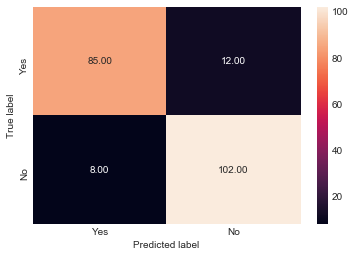

Total Accuracy :  0.9
Mis-classification Rate :  0.1
Precision :  0.91
Recall :  0.88


In [62]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

print("\nConfusion Matrix for training data")
print(cm1)

draw_cm( y_pred_df.actual, y_pred_df.predicted )

print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_train, y_pred_df.predicted ), 2 ) )

print( 'Mis-classification Rate : ',np.round(  1- metrics.accuracy_score(  y_train, y_pred_df.predicted ), 2 ) )

print( 'Precision : ',np.round( metrics.precision_score( y_train, y_pred_df.predicted ), 2 ) )

print( 'Recall : ',np.round( metrics.recall_score( y_train, y_pred_df.predicted ), 2 ) )

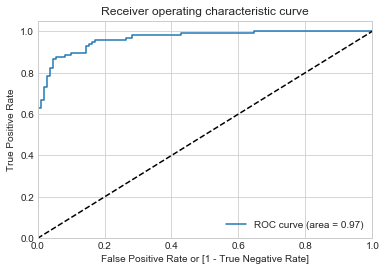

In [63]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

### Testing data

In [64]:
y_pred_df = get_predictions( x_test, y_test, lg )

In [65]:
y_pred_df[0:10]

,actual,predicted_prob
2,1,0.999844
299,1,0.999550
264,1,0.999207
44,1,0.012813
130,0,0.201179
136,1,0.996430
13,0,0.149112
183,0,0.987033
271,0,0.486028
100,0,0.028722


In [66]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df[0:10]

,actual,predicted_prob,predicted
2,1,0.999844,1
299,1,0.999550,1
264,1,0.999207,1
44,1,0.012813,0
130,0,0.201179,0
136,1,0.996430,1
13,0,0.149112,0
183,0,0.987033,1
271,0,0.486028,0
100,0,0.028722,0



Confusion Matrix for testing data
[[31  9]
 [ 5 45]]


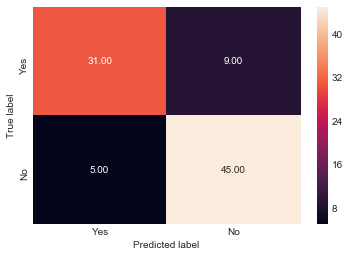

Total Accuracy :  0.84
Mis-classification Rate :  0.16
Precision :  0.86
Recall :  0.78


In [67]:
cm2 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

print("\nConfusion Matrix for testing data")
print(cm2)

draw_cm( y_pred_df.actual, y_pred_df.predicted )

print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

print( 'Mis-classification Rate : ',np.round(  1- metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )


print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )

print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )



In [68]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)

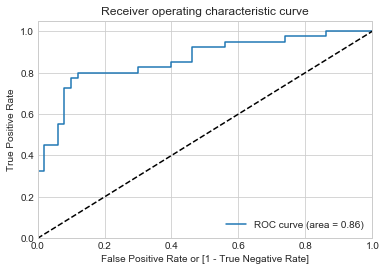

In [69]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

### Reporting Performance Measures

| Serial Number | Performance Measure | Training Data set | Testing Data set |
| --- | --- | --- | --- |
| 1 | Precision |  91% | 86%|
| 2 | Recall |  88% | 78%|
| 3 | AUROC |  97% | 86%|
| 4 | Accuracy Ratio |  90% | 84%|
| 5 | Mis Classification Rate |  10% | 16%|



**Observation**

We find that the model performance remains good when tested with both training and testing datasets.

#### Finding optimum cut-off using Youden's J-Score

Youden's index is where (Sensitivity+Specificity - 1) or (TPR+TNR -1) is maximum.


In [70]:
# Find optimal probability threshold
threshold = get_youdens_j_cutoff(fpr,tpr,thresholds)
print(threshold)

0.452632410994


The optimal cut off point is 0.45, so anything above this can be labeled as 1 else 0. 


Confusion Matrix for testing data using cutoff at 0.45
[[32  8]
 [ 6 44]]


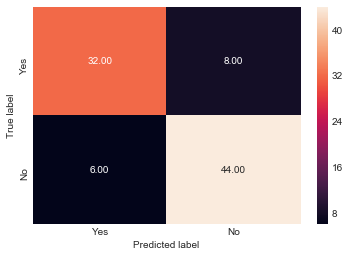

Total Accuracy :  0.84
Mis classification rate :  0.16
Precision :       0.84
Recall :          0.8


In [80]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.45 else 0)

cm3 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

print("\nConfusion Matrix for testing data using cutoff at 0.45")
print(cm3)

draw_cm( y_pred_df.actual, y_pred_df.predicted )

print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

print( 'Mis classification rate : ',np.round( 1- metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

print( 'Precision :      ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )

print( 'Recall :         ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

### The optimal cut off would be where tpr is high and fpr is low

### tpr - (1-fpr) is zero or near to zero is the optimal cut off point

In [72]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index = i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})

### Plot tpr vs 1-fpr

[]

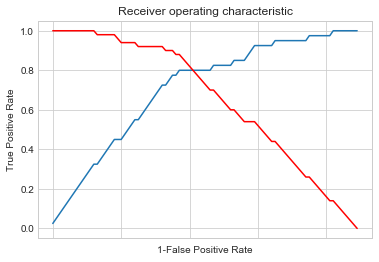

In [73]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [74]:
roc.loc[roc['thresholds'] == threshold]

,1-fpr,fpr,tf,thresholds,tpr
37,0.88,0.12,-0.08,0.452632,0.8


**Observation**

You can see from the output/chart that where tpr is crossing 1-fpr the tpr is 80%, fpr is 12% and tpr-(1-fpr) is nearest to zero.

| Serial Number | Performance Measure | At cutoff (Youden's Index) 45% | cutoff at 50% |
| --- | --- | --- | --- |
| 1 | Precision |  84% | 86%|
| 2 | Recall |  80% | 78%|
| 3 | Accuracy Ratio |  84% | 84%|
| 4 | Mis classification rate | 16% | 16%| 


**Observation**

We observe that Recall has increased to 80% at 45% cutoff when compared to 78% at standard 50% cutoff.
This means that low false negative rates. This is desirable since falsely predicting a patient as not AHD patient is  nearly fatal. 

#### Cut-off using cost of mis-classification

In [75]:
cost_fn = 200
cost_fp = 100
print("\n Cost of Misclassification at 45% cutoff")
get_cost_cutoff( y_pred_df.actual, y_pred_df.predicted, cost_fp, cost_fn )


 Cost of Misclassification at 45% cutoff


2200

#### Calculate cost of mis-classification using different cutoffs from 20% to 80%

In [76]:
df_cost = pd.DataFrame( columns = ['prob', 'cost'])

idx = 0

for each_prob in range( 20, 80):
    cost = get_cost_cutoff( y_pred_df.actual,
                          y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100)  else 0), cost_fp, cost_fn )
    df_cost.loc[idx] = [(each_prob/100), cost]
    idx += 1

df_cost.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
25,0.45,2200.0
29,0.49,2300.0
20,0.40,2300.0
21,0.41,2300.0
22,0.42,2300.0


**Observation**

We observe optimal cutoff probability (ie. the one incurring the least cost) using cost function is also 45% same as the one obtained through Youdens Index.

### Practice Exercise 1

The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Dataset:** 

*pima-indians-diabetes.data* is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.


Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Source: Kaggle https://www.kaggle.com/uciml/pima-indians-diabetes-database

| SlNo | Variable | Description |
| ---- | -------------------- | ----------------------------------------- |
| 1 | Pregnancies | Number of times pregnant |
| 2 | Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | 
| 3 | BloodPressure | Diastolic blood pressure (mm Hg) | 
| 4 | SkinThickness | Triceps skin fold thickness (mm) | 
| 5 | Insulin | 2-Hour serum insulin (mu U/ml) | 
| 6 | BMI | Body mass index (weight in kg/(height in m)^2) | 
| 7 | DiabetesPedigreeFunction | Diabetes pedigree function | 
| 8 | Age | Age (years) | 
| 9 | Outcome | Class variable (0 or 1) | 

In [77]:
import pandas            as  pd
import numpy             as  np
import seaborn           as  sns
import matplotlib.pyplot as  plt
import statsmodels.api   as  sm
import sys, os

from   common           import  draw_boxplot, draw_hist, split_target_predictor, split_train_test 

from   model_building   import  check_linearity, get_significant_vars, logit_reg

names  = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data   = pd.read_csv('./data/pima-indians-diabetes.data.csv', header = None, names = names) 
target = 'class'
n      = data.shape[0]

In [78]:
print(data.info())
print(data.head().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
             0       1        2       3        4
preg     6.000   1.000    8.000   1.000    0.000
plas   148.000  85.000  183.000  89.000  137.000
pres    72.000  66.000   64.000  66.000   40.000
skin    35.000  29.000    0.000  23.000   35.000
test     0.000   0.000    0.000  94.000  168.000
mass    33.600  26.600   23.300  28.100   43.100
pedi     0.627   0.351    0.672   0.167    2.288
age     50.000  31.000   32.000  21.000   33.000
class    1.000   0.000    1.000   0.000    1.000


### Test the following assumptions of Logistic Regression:

##### 1)   Binary logistic regression requires the target / dependent variable to be binary. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome (such as Success etc..). 
##### 2)   Only the meaningful variables should be included. 
##### 3)   The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity. 
##### 4)   The independent variables are linearly related to the log odds. 
##### 5)   Logistic regression requires quite a large number of observations.


**You can use the required functions contained in the two enclosed python files common.py and model_building.py**

### Practice Exercise 2

1) Build a Logistic Regression model for this data set.

2) Find the McFadden R square and list the significant variables at 5% level of significance 

3) Interpret the odds ratio.

4) Evaulate the model performance by using Accuracy Ratio, Mis-classification rate, Precision and Recall. 

### Take Home Exercises

####  Predicting Loan Repayment

In the lending industry, investors provide loans to borrowers in exchange for the promise of repayment with interest. If the borrower repays the loan, then the lender profits from the interest. However, if the borrower is unable to repay the loan, then the lender loses money. Therefore, lenders face the problem of predicting the risk of a borrower being unable to repay a loan.

To address this problem, we will use publicly available data from LendingClub.com, a website that connects borrowers and investors over the Internet. This dataset represents 9,578 3-year loans that were funded through the LendingClub.com platform between May 2007 and February 2010. The binary dependent variable not_fully_paid indicates that the loan was not paid back in full (the borrower either defaulted or the loan was "charged off," meaning the borrower was deemed unlikely to ever pay it back).

To predict this dependent variable, we will use the following independent variables available to the investor when deciding whether to fund a loan:

| Sl No | Variable | Description |
| -- | ------------------ | ------------------------------------ |
| 1 | credit.policy: | 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
| 2 | purpose:  |  The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
| 3 | int.rate:  | The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
| 4 | installment:  | The monthly installments ($) owed by the borrower if the loan is funded.
| 5 | log.annual.inc:  | The natural log of the self-reported annual income of the borrower.
| 6 | dti:  | The debt-to-income ratio of the borrower (amount of debt divided by annual income).
| 7 | fico:  | The FICO credit score of the borrower.
| 8 | days.with.cr.line:  | The number of days the borrower has had a credit line.
| 9 | revol.bal:  | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
| 10 | revol.util:  | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
| 11 | inq.last.6mths:  | The borrower's number of inquiries by creditors in the last 6 months.
| 12 | delinq.2yrs:  | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
| 13 | pub.rec:  | The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [79]:
import pandas as pd

data = pd.read_csv('./data/loans_imputed.csv')
print(data.info())
print(data.shape)
print(data.head(3).T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
(9578, 14)
                                    0            1                   2
credit.policy                       1            1                   1
purpose            debt_consolidation  credit_card  debt_consolidation
int.rate       

### Exercise 1

Now that we have prepared the dataset, we need to split it into a training and testing set. To ensure everybody obtains the same split, set the random seed to 144 (even though you already did so earlier in the problem) and use the sample.split function to select the 70% of observations for the training set (the dependent variable for sample.split is not.fully.paid). 

Name the data frames train and test.

Now, use logistic regression trained on the training set to predict the dependent variable not.fully.paid using all the independent variables.

#### Q1) Which independent variables are significant in our model? (Significant variables have at least one star, or a Pr(>|z|) value less than 0.05.) 

* credit.policy
* purpose2 (credit card)
* purpose3 (debt consolidation)
* purpose4 (educational)
* purpose5 (home improvement)
* purpose6 (major purchase)
* purpose7 (small business)
* int.rate
* installment
* log.annual.inc
* dti
* fico
* days.with.cr.line
* revol.bal
* revol.util
* inq.last.6mths
* delinq.2yrs
* pub.rec

Consider two loan applications, which are identical other than the fact that the borrower in Application A has FICO credit score 700 while the borrower in Application B has FICO credit score 710.
Let Logit(A) be the log odds of loan A not being paid back in full, according to our logistic regression model, and define Logit(B) similarly for loan B. 

#### Q(2): What is the value of Logit(A) - Logit(B)?

Now, let O(A) be the odds of loan A not being paid back in full, according to our logistic regression model, and define O(B) similarly for loan B. 

#### Q(3): What is the value of O(A)/O(B)? (HINT: Use the mathematical rule that exp(A + B + C) = exp(A)*exp(B)*exp(C). Also, remember that exp() is the exponential function in R.)

Predict the probability of the test set loans not being paid back in full (remember type="response" for the predict function). Store these predicted probabilities in a variable named predicted risk and add it to your test set (we will use this variable in later parts of the problem). 

#### Q(4): 
a. Compute the confusion matrix using a threshold of 0.5.
b. What is the accuracy of the logistic regression model? Input the accuracy as a number between 0 and 1.
c. What is the accuracy of the baseline model? Input the accuracy as a number between 0 and 1.

#### Q(5):Use the appropriate package to compute the test set AUC.

The model has poor accuracy at the threshold 0.5. But despite the poor accuracy, we will see later how an investor can still leverage this logistic regression model to make profitable investments.

### Exercise 2

In the previous problem, we built a logistic regression model that has an AUC significantly higher than the AUC of 0.5 that would be obtained by randomly ordering observations.

However, LendingClub.com assigns the interest rate to a loan based on their estimate of that loan's risk. This variable, int.rate, is an independent variable in our dataset. In this part, we will investigate using the loan's interest rate as a "smart baseline" to order the loans according to risk.

#### Q(5): Using the training set, build a bivariate logistic regression model (aka a logistic regression model with a single independent variable) that predicts the dependent variable not.fully.paid using only the variable int.rate.

#### Q(6): The variable int.rate is highly significant in the bivariate model, but it is not significant at the 0.05 level in the model trained with all the independent variables. What is the most likely explanation for this difference?

a) int.rate is correlated with other risk-related variables, and therefore does not incrementally improve the model when those other variables are included.

b) This effect is likely due to the training/testing set split we used. In other splits, we could see the opposite effect.

c) These models are trained on a different set of observations, so the coefficients are not comparable.

#### Q(6): 

a. Make test set predictions for the bivariate model. 
b. What is the highest predicted probability of a loan not being paid in full on the testing set?
c. With a logistic regression cutoff of 0.5, how many loans would be predicted as not being paid in full on the testing set?

#### Q(7): What is the test set AUC of the bivariate model?

## END